## Dataset: A databank for intracellular electrophysiological mapping of the adult somatosensory cortex

See https://github.com/OpenSourceBrain/NWBShowcase/issues/5

170502_AL_257_CC.mat  180817_ME_9_CC.mat		    README.md
171222_NC_162_FN.mat  LantyerEtAl2018.170502_AL_257_CC.nwb  TestData.ipynb
Contents of MAT file 170502_AL_257_CC.mat: ['Trace_2_1_10_1', 'Trace_2_1_10_2', 'Trace_2_1_1_1', 'Trace_2_1_1_2', 'Trace_2_1_2_1', 'Trace_2_1_2_2', 'Trace_2_1_3_1', 'Trace_2_1_3_2', 'Trace_2_1_4_1', 'Trace_2_1_4_2', 'Trace_2_1_5_1', 'Trace_2_1_5_2', 'Trace_2_1_6_1', 'Trace_2_1_6_2', 'Trace_2_1_7_1', 'Trace_2_1_7_2', 'Trace_2_1_8_1', 'Trace_2_1_8_2', 'Trace_2_1_9_1', 'Trace_2_1_9_2', 'Trace_2_2_10_1', 'Trace_2_2_10_2', 'Trace_2_2_1_1', 'Trace_2_2_1_2', 'Trace_2_2_2_1', 'Trace_2_2_2_2', 'Trace_2_2_3_1', 'Trace_2_2_3_2', 'Trace_2_2_4_1', 'Trace_2_2_4_2', 'Trace_2_2_5_1', 'Trace_2_2_5_2', 'Trace_2_2_6_1', 'Trace_2_2_6_2', 'Trace_2_2_7_1', 'Trace_2_2_7_2', 'Trace_2_2_8_1', 'Trace_2_2_8_2', 'Trace_2_2_9_1', 'Trace_2_2_9_2', 'Trace_2_3_10_1', 'Trace_2_3_10_2', 'Trace_2_3_1_1', 'Trace_2_3_1_2', 'Trace_2_3_2_1', 'Trace_2_3_2_2', 'Trace_2_3_3_1', 'Trace_2_3_3_2', 'Tr

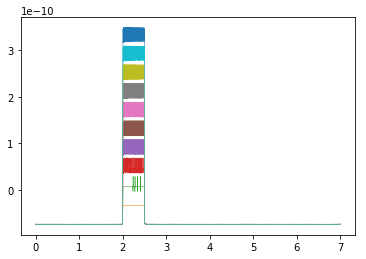

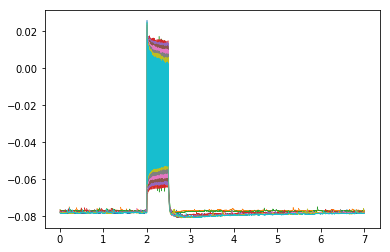

In [1]:
!ls

import matplotlib.pyplot as plt
%matplotlib inline 

import scipy.io as sio
data_ref = '170502_AL_257_CC'
mat_file = '%s.mat'%data_ref
mat_contents = sio.loadmat(mat_file)

print('Contents of MAT file %s: %s'%(mat_file, sorted(mat_contents.keys())))

    
for t in mat_contents.keys():
    if 'Trace_2_2_' in t and t.endswith('_1'):
        print('Current injection trace: %s'%t)
        trace = mat_contents[t].T
        
        plt.plot(trace[0],trace[1], lw=.5, label='%s'%t)
        
plt.figure()
for t in mat_contents.keys():
    if 'Trace_2_2_' in t and t.endswith('_2'):
        print('Response trace: %s'%t)
        trace = mat_contents[t].T
        
        plt.plot(trace[0],trace[1], lw=.5, label='%s'%t)
        
        
        


In [2]:
from datetime import datetime

from dateutil.tz import tzlocal
import pynwb
import math

start_time = datetime(2019, 1, 1, 11, tzinfo=tzlocal())
create_date = datetime.now(tz=tzlocal())

nwbfile = pynwb.NWBFile('Lantyer et al.', 
                  'TSD', 
                  start_time,
                  file_create_date=create_date,
                  notes='Ephys created with pynwb v%s'%pynwb.__version__,
                  experimenter='Angelica da Silva Lantyer et al.',
                  experiment_description='A databank for intracellular electrophysiological mapping of the adult somatosensory cortex',
                  institution='Donders Institute for Brain, Cognition and Behaviour, Radboud University')
                  

for t in mat_contents.keys():
    if 'Trace_2_2' in t:
        print('Trace: %s'%t)
        trace = mat_contents[t].T
        
        #plt.plot(trace[0],trace[1], lw=.5, label='%s'%t)
        
        timestamps = trace[0]
        data = trace[1]


        if t.endswith('_1'):
            ts_stim = pynwb.TimeSeries('%s'%t, data, 'A', timestamps=timestamps)
            nwbfile.add_stimulus(ts_stim)
        if t.endswith('_2'):
            ts_acq = pynwb.TimeSeries('%s'%t, data, 'mV', timestamps=timestamps)
            nwbfile.add_acquisition(ts_acq)
            

nwb_file_name = 'LantyerEtAl2018.%s.nwb'%(data_ref)
io = pynwb.NWBHDF5IO(nwb_file_name, mode='w')
io.write(nwbfile)
io.close()
print("Written NWB file to %s"%nwb_file_name)

Trace: Trace_2_2_10_1
Trace: Trace_2_2_10_2
Trace: Trace_2_2_1_1
Trace: Trace_2_2_1_2
Trace: Trace_2_2_2_1
Trace: Trace_2_2_2_2
Trace: Trace_2_2_3_1
Trace: Trace_2_2_3_2
Trace: Trace_2_2_4_1
Trace: Trace_2_2_4_2
Trace: Trace_2_2_5_1
Trace: Trace_2_2_5_2
Trace: Trace_2_2_6_1
Trace: Trace_2_2_6_2
Trace: Trace_2_2_7_1
Trace: Trace_2_2_7_2
Trace: Trace_2_2_8_1
Trace: Trace_2_2_8_2
Trace: Trace_2_2_9_1
Trace: Trace_2_2_9_2
Written NWB file to LantyerEtAl2018.170502_AL_257_CC.nwb
